# Pokemon Classifier using DenseNet 201 architecture

## Importing the necessary libraries

In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


## Feeding in and exploring the dataset

In [38]:
directory = 'PokemonData'
IMAGE_SIZE = 128
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 6820 files belonging to 150 classes.


In [6]:
class_names = dataset.class_names
class_names

['Abra',
 'Aerodactyl',
 'Alakazam',
 'Alolan Sandslash',
 'Arbok',
 'Arcanine',
 'Articuno',
 'Beedrill',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Butterfree',
 'Caterpie',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Clefable',
 'Clefairy',
 'Cloyster',
 'Cubone',
 'Dewgong',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Dragonair',
 'Dragonite',
 'Dratini',
 'Drowzee',
 'Dugtrio',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Farfetchd',
 'Fearow',
 'Flareon',
 'Gastly',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Growlithe',
 'Gyarados',
 'Haunter',
 'Hitmonchan',
 'Hitmonlee',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Kingler',
 'Koffing',
 'Krabby',
 'Lapras',
 'Lickitung',
 'Machamp',
 'Machoke',
 'Machop',
 'Magikarp',
 'Magmar',
 'Magnemite',
 'Magneton',
 'Mankey',
 'Marowak',
 '

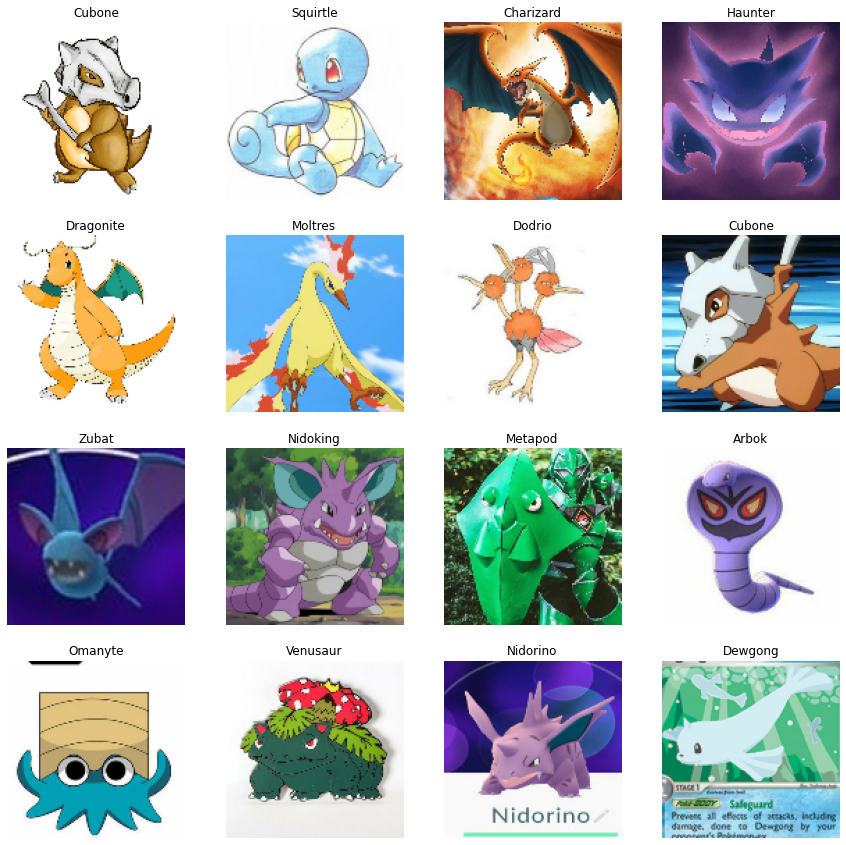

In [7]:
plt.figure(figsize=(15,15))

for image_batch, label_batch in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

## Create ImageDataGenerators for smooth flow of input files while training and testing

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    fill_mode='nearest'
    
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 4703 images belonging to 150 classes.


In [21]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 1502 images belonging to 150 classes.


In [22]:
test_generator

In [23]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    fill_mode='nearest'
    
)

val_generator = val_datagen.flow_from_directory(
    'dataset/val',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 615 images belonging to 150 classes.


## Using Transfer Learning from the DenseNet201 Model

In [25]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 150

dense_model = tf.keras.applications.DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

In [26]:
for layer in dense_model.layers[:675]:
    layer.trainable = False

    
for layer in dense_model.layers[675:]:
    layer.trainable = True

In [27]:
for i, layer in enumerate(dense_model.layers):
    print(i, layer.name, '-', layer.trainable)

0 input_2 - False
1 zero_padding2d - False
2 conv1/conv - False
3 conv1/bn - False
4 conv1/relu - False
5 zero_padding2d_1 - False
6 pool1 - False
7 conv2_block1_0_bn - False
8 conv2_block1_0_relu - False
9 conv2_block1_1_conv - False
10 conv2_block1_1_bn - False
11 conv2_block1_1_relu - False
12 conv2_block1_2_conv - False
13 conv2_block1_concat - False
14 conv2_block2_0_bn - False
15 conv2_block2_0_relu - False
16 conv2_block2_1_conv - False
17 conv2_block2_1_bn - False
18 conv2_block2_1_relu - False
19 conv2_block2_2_conv - False
20 conv2_block2_concat - False
21 conv2_block3_0_bn - False
22 conv2_block3_0_relu - False
23 conv2_block3_1_conv - False
24 conv2_block3_1_bn - False
25 conv2_block3_1_relu - False
26 conv2_block3_2_conv - False
27 conv2_block3_concat - False
28 conv2_block4_0_bn - False
29 conv2_block4_0_relu - False
30 conv2_block4_1_conv - False
31 conv2_block4_1_bn - False
32 conv2_block4_1_relu - False
33 conv2_block4_2_conv - False
34 conv2_block4_concat - False
35 c

### Added a feed-forward neural network for classifying into 150 Pokemon

In [28]:
model = tf.keras.models.Sequential()
model.add(dense_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(n_classes, activation=tf.nn.softmax))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 4, 4, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               288150    
Total params: 18,610,134
Trainable params: 1,434,134
Non-trainable params: 17,176,000
_________________________________________________________________


In [30]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    optimizer=tf.keras.optimizers.Adam(lr = 0.001), 
    metrics=['accuracy']
)

## Early stopping conditions incase the model does not improve for some time

In [33]:
filepath = 'model_pokemon.h5'
checkpoint = ModelCheckpoint(
    filepath, 
    monitor='val_accuracy',
    verbose = 1,
    save_best_only=True,
    mode='max',
    save_weights_only = False
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    verbose=1,
    factor=0.2,
    min_lr=0.0001
)

callbacks_list = [
    checkpoint,
    early_stopping,
    learning_rate_reduction
]

In [34]:
history = model.fit(
        train_generator,
    steps_per_epoch=147,
    batch_size=BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=19,
    verbose = 1,
    epochs = 20,
    callbacks=callbacks_list
)

Epoch 1/20
147/147 [==============================] - 116s 737ms/step - loss: 4.4167 - accuracy: 0.1675 - val_loss: 1.6240 - val_accuracy: 0.6036

Epoch 00001: val_accuracy improved from -inf to 0.60362, saving model to model_pokemon.h5
Epoch 2/20
147/147 [==============================] - 118s 804ms/step - loss: 1.3982 - accuracy: 0.7048 - val_loss: 1.1529 - val_accuracy: 0.7105

Epoch 00002: val_accuracy improved from 0.60362 to 0.71053, saving model to model_pokemon.h5
Epoch 3/20
147/147 [==============================] - 117s 796ms/step - loss: 0.7851 - accuracy: 0.8338 - val_loss: 1.0510 - val_accuracy: 0.7237

Epoch 00003: val_accuracy improved from 0.71053 to 0.72368, saving model to model_pokemon.h5
Epoch 4/20
147/147 [==============================] - 121s 825ms/step - loss: 0.4942 - accuracy: 0.8895 - val_loss: 0.9032 - val_accuracy: 0.7714

Epoch 00004: val_accuracy improved from 0.72368 to 0.77138, saving model to model_pokemon.h5
Epoch 5/20
147/147 [=======================

In [35]:
scores = model.evaluate(test_generator)

47/47 [==============================] - 30s 627ms/step - loss: 0.5070 - accuracy: 0.8702


Thus our model achieved 87% test set accuracy.

In [36]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

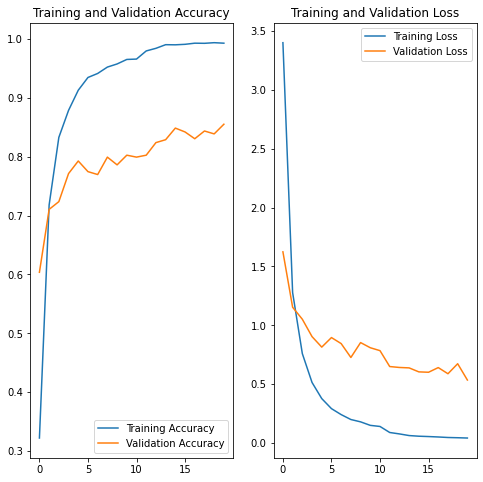

In [39]:
#Plotting the history of the model training

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
y_pred = model.predict(test_generator)
pred = np.argmax(y_pred,axis=1)
print(pred)


[139  59 132 ...  78  31 124]


KeyboardInterrupt: 

In [43]:
pred

array([139,  59, 132, ...,  78,  31, 124])

In [45]:
y_pred

array([[7.3104587e-07, 3.5433846e-08, 1.5369253e-06, ..., 3.0826808e-09,
        5.9609344e-09, 9.9202076e-08],
       [9.7054370e-05, 1.2370803e-04, 1.1969104e-04, ..., 1.0773538e-07,
        2.2605559e-02, 2.0157636e-06],
       [4.1968637e-08, 7.2393513e-09, 5.0104035e-07, ..., 4.1404158e-10,
        1.4861801e-09, 2.7542086e-08],
       ...,
       [1.5386750e-06, 3.4433492e-06, 8.7354465e-06, ..., 7.6866687e-05,
        6.2067680e-05, 2.5586357e-06],
       [1.8991699e-05, 1.4898172e-05, 1.9565299e-07, ..., 2.7997801e-06,
        5.0593673e-08, 3.3065724e-08],
       [3.1881389e-06, 3.0880085e-06, 1.0497716e-08, ..., 7.1410068e-06,
        1.8964427e-07, 3.4586064e-06]], dtype=float32)

### Checking results for random images from the test set
Feel free to change value of i or run the cell multiple times to view different images

image to predict
Actual Label:  Ninetales
Predicted Label:  Ninetales


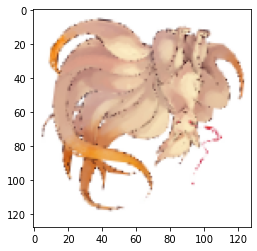

In [109]:
i = 4
for images_batch, labels_batch in test_generator:
    first_image = images_batch[0]
    first_label = int(labels_batch[0])

    print("image to predict")
    plt.imshow(first_image)
    print("Actual Label: ", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label: ", class_names[np.argmax(batch_prediction[0])])
    break

In [84]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

### Checking for wrongly classified Pokemon in the test set

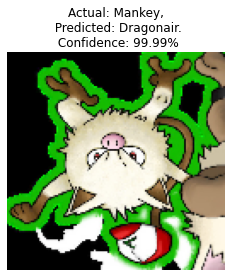

In [126]:


for images, labels in test_generator:
    predicted_class, confidence = predict(model, images[0])
    actual_class = class_names[int(labels[0])] 
    if actual_class != predicted_class:
        plt.imshow(images[0])
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis("off")
    break


In [71]:
model.save('final.h5')